# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This Is the TMDb movie data set for data analysis.
> It Contains 10866 Rows and 21 Columns



In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [216]:
# Reading the CSV File Using Pandas read_csv function
df = pd.read_csv('tmdb-movies.csv')

# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

     Observation 

- the dataset contains null values
- 'release_date' column is 'object' tybe


In [217]:
# measuring the null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [218]:
# Return the first 5 rows.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [219]:
# Return the last 5 rows.
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


    Observation 

- 'budget', 'revenue' columns has some 0 values
 

In [220]:
# check for duplicate rows
sum(df.duplicated())

1

    observation
- There is a duplicate row

### Data Cleaning 
( 

    modifying steps
    
        - Removing the unimportant columns that we won't gonna use.
        - Changing 'release_date' tybe to datetime format.
        - removing duplicate rows.
        - Removing movies that are having '0' value of revenue and budget(since revenue and budget is not usable for the first question, I'm gonna delete the 0 values rows later for more accuracy for the analysis on the first question)
                                                                                )

In [221]:
# Removing the unimportant columns that we won't gonna use.
df.drop(['homepage', 'budget_adj','revenue_adj', 'imdb_id', 'overview', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.ffill(inplace=True)
df.head()



,id,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [222]:
# Changing 'release_date' tybe to datetime format.
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(3)


0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

In [223]:
# removing duplicate rows.
df.drop_duplicates(inplace = True)
sum(df.duplicated())




0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015      

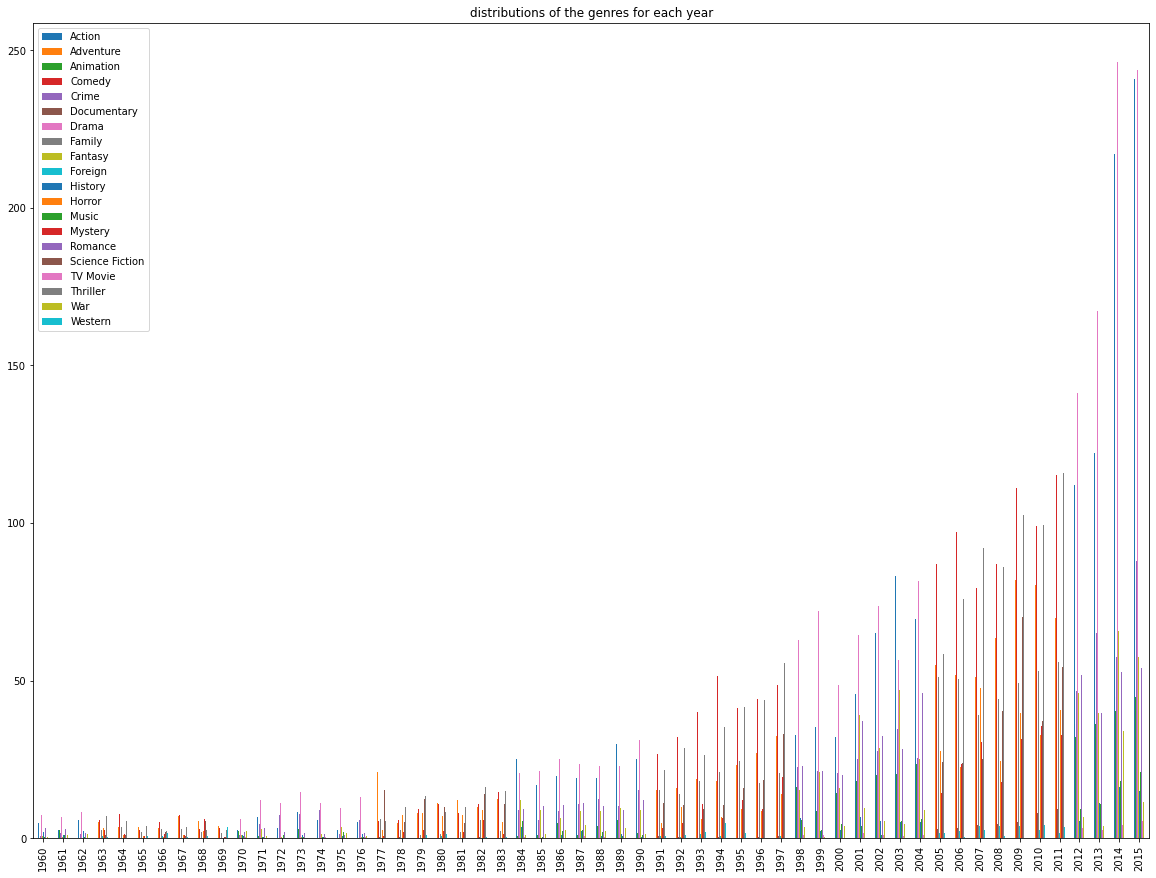

In [224]:
# find genres
genres = []
genres_x = list(map(str,(df['genres'])))
for i in genres_x:
    g = i.split('|')
    for i in g:
        genres.append(i)
genres = list(set(genres))
genres.sort()

# make a NaN dataframe genres as rows and range of years as columns 
q1_df = pd.DataFrame(index = genres, columns = range(1960, 2016))
q1_df = q1_df.fillna(value = 0.0)

# make numpy arrays for years an popularity from the database that associate with every movie in the list
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

# make a list of genres that associate with every movie in the list
gen = []
for i in df['genres']:
    g = i.split('|')
    gen.append(g)

# make a loop that gonna fill the new dataset with values from the two arrays and the list that been made (year,popularity,gen)
a = 0
for i in gen :
    q1_df.loc[i, year[a]] += popularity[a]
    a += 1
    
# replacing the dataset row with columns to be easier to see
q1_df_t = q1_df.T

# plot for visualizing the distributions of the genres for each year
q1_df_t.plot(title='distributions of the genres for each year' ,kind='bar',figsize = (20,15),fontsize=10)

# Return index of first occurrence of maximum over requested axis.
q1_df.idxmax()


### Research Question 2  (Which movies are the most popular of all time?)


In [225]:
# load the columns from the database to lists
titles = df['original_title'].tolist()
popularity = df['popularity'].tolist()

#  fill the new dataset with the lists
d = pd.DataFrame(popularity,titles)

# sort the list with popularity descending
d.sort_values(by=0, ascending=False)

# show the highest 5 movies
d.head()






,0
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Insurgent,13.112507
Star Wars: The Force Awakens,11.173104
Furious 7,9.335014


    observation
    
        the most popular movies is
    
            Jurassic World	32.985763

            Mad Max: Fury Road	28.419936

            Insurgent	13.112507

            Star Wars: The Force Awakens	11.173104

            Furious 7	9.335014

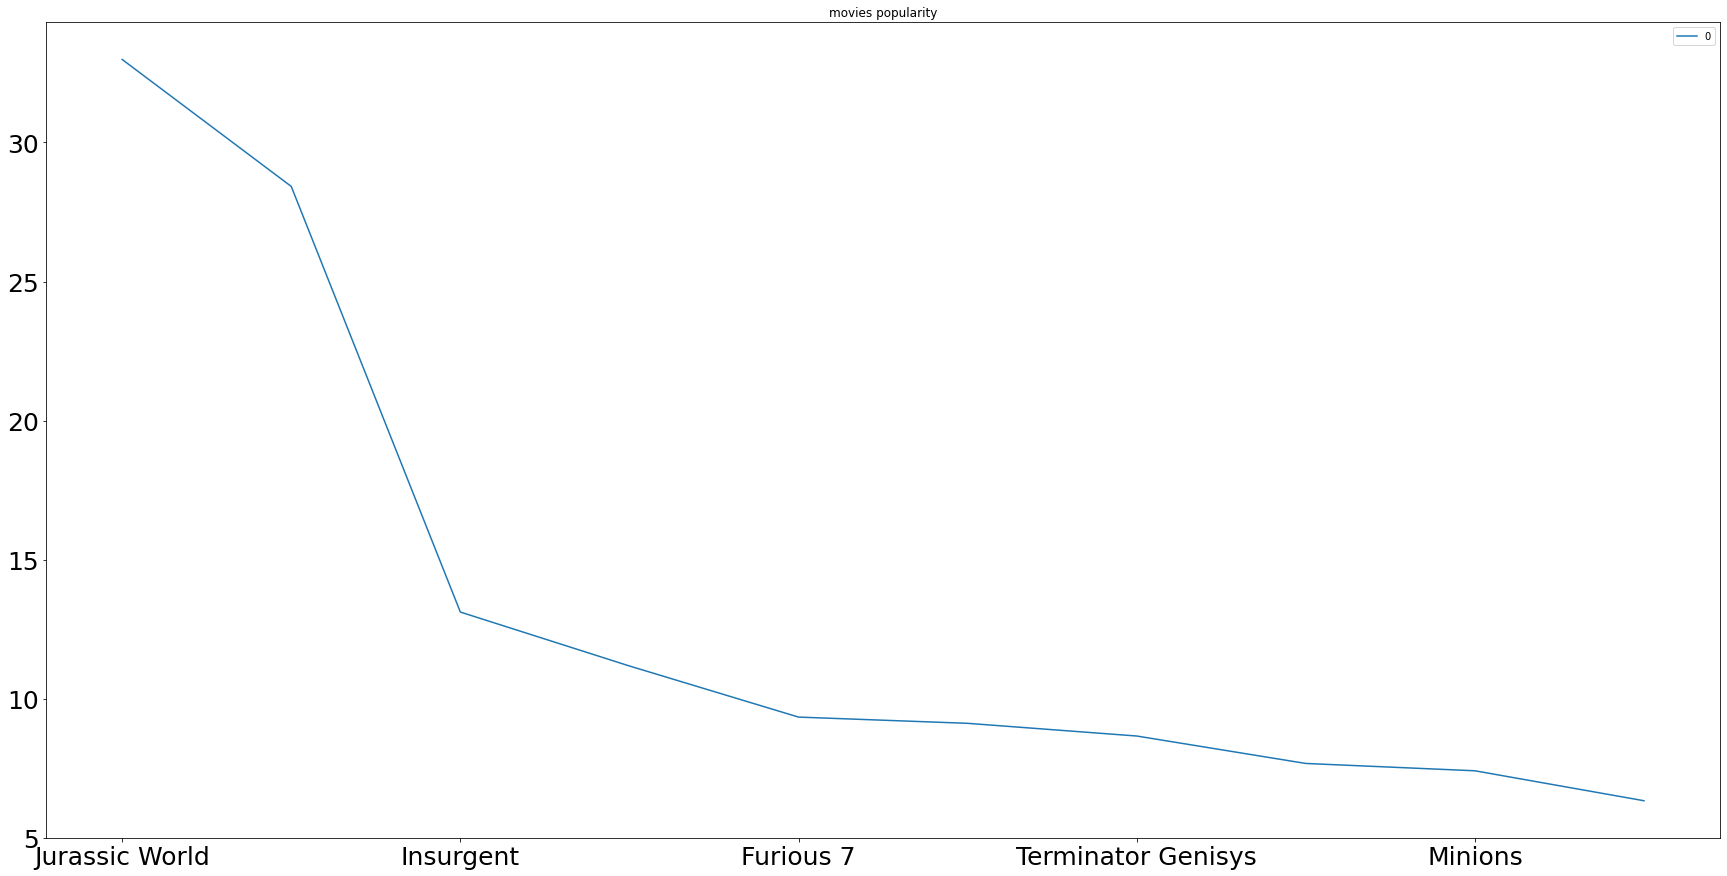

In [226]:
# The spread of the popularity among the most popular movies
d.iloc[:10].plot(title='movies popularity' ,figsize = (30,15),fontsize=25);


    observation
        Jurassic World and Mad Max: Fury Road are more popular than the rest of the movies
        

### Research Question 3  (What kinds of properties are associated with movies that have high revenues?)

In [227]:
# Removing movies that are having '0' value of revenue and budget.
df = df[df.budget != 0]
df = df[df.revenue != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   int64         
 3   revenue         3854 non-null   int64         
 4   original_title  3854 non-null   object        
 5   cast            3854 non-null   object        
 6   director        3854 non-null   object        
 7   tagline         3854 non-null   object        
 8   runtime         3854 non-null   int64         
 9   genres          3854 non-null   object        
 10  release_date    3854 non-null   datetime64[ns]
 11  vote_count      3854 non-null   int64         
 12  vote_average    3854 non-null   float64       
 13  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
m

<AxesSubplot:>

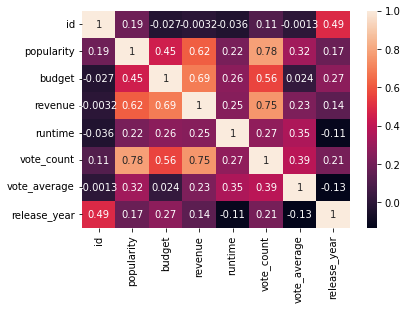

In [228]:
# plot for the highest correlation between columns
sns.heatmap(df.corr(), annot=True)

        observation
    Budget and Vote count are the highest correlation to revenue

Text(0.5, 1.0, 'revenue VS runtime')

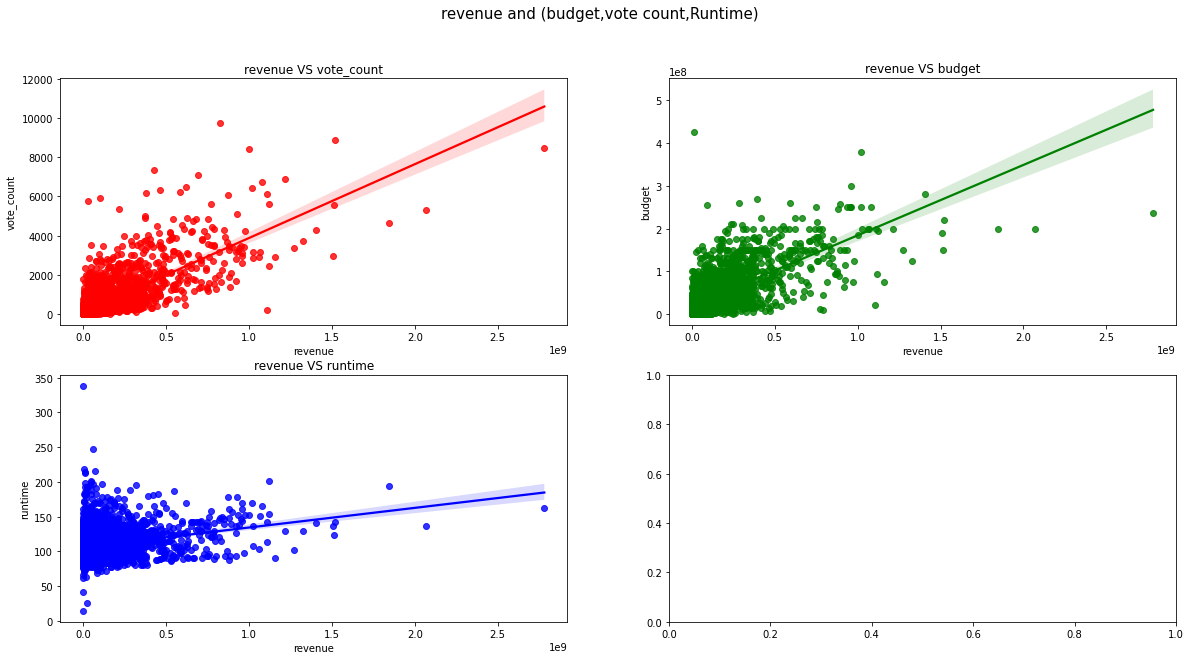

In [229]:
# making the subplot function using number of rows and columns
figure, axis = plt.subplots(2,2,figsize = (20,10))
figure.suptitle("revenue and (budget,vote count,Runtime)",fontsize=15)

# separate visual connection between revenue and (budget, vote count, Runtime)
sns.regplot(x=df['revenue'], y=df['vote_count'],ax=axis[0][0], color='r').set_title("revenue VS vote_count")
sns.regplot(x=df['revenue'], y=df['budget'],ax=axis[0][1], color='g').set_title("revenue VS budget")
sns.regplot(x=df['revenue'], y=df['runtime'],ax=axis[1][0], color='b').set_title("revenue VS runtime")


     plot description
    
'Vote count vs Revenue' and 'Budget vs Revenue' is the hightest correlation
with 0.75 for vote count
and 0.69 for budget

the revenue VS Runtime plot shows a lot of outliers, the runtime has a very high chance of being not connected to the revenue

<a id='conclusions'></a>
## Conclusions

> **Q1**: 1960        Drama
1961        Drama
1962        Drama
1963     Thriller
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978        Drama
1979        Drama
1980       Action
1981    Adventure
1982        Drama
1983       Action
1984       Action
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991       Comedy
1992       Comedy
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997     Thriller
1998        Drama
1999        Drama
2000       Comedy
2001        Drama
2002        Drama
2003       Action
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama
2015        Drama

> **Q2**: Jurassic World , Mad Max: Fury Road , Insurgent , Star Wars: The Force Awakens , Furious 7  Are the most popular movies
Jurassic World and Mad Max: Fury Road are more popular than the rest of the movies



           

> **Q3**: Budget and Vote count are associated with movies that have high revenues

<a id='conclusions'></a>
## Limitations  

In this database, there were a lot of movies where the budget and revenue had a value of '0' which it's probably wasn't recorded. using these columns will lead to inappropriate results and so when I used budget and revenue columns I had to delete these rows - that had value = 0 - which will lead to inaccuracy


    References
    
    https://seaborn.pydata.org/generated/seaborn.heatmap.html
    https://seaborn.pydata.org/generated/seaborn.regplot.html
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html
    https://note.nkmk.me/en/python-pandas-t-transpose/
    https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
    https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
    